In [6]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [7]:
df_nav = pd.read_csv("/Users/syedaman/Desktop/Data/NavHistory.csv",header='infer')

In [8]:
df_nav.head()

,code,nav_date,nav,repurchase_price,sale_price
0,120373,2018-12-03,688138.0,0,0
1,120373,2018-12-04,686524.0,0,0
2,120373,2018-12-05,681853.0,0,0
3,120373,2018-12-06,674551.0,0,0
4,120373,2018-12-07,680586.0,0,0


In [9]:
df_funds = pd.read_csv("/Users/syedaman/Desktop/Data/AMC.csv",header='infer')

In [10]:
df_funds.head()

,id,name
0,1,Sahara Mutual Fund
1,2,Taurus Mutual Fund
2,3,Baroda Mutual Fund
3,4,BNP Paribas Mutual Fund
4,5,Essel Mutual Fund


In [11]:
df_mutual = pd.read_csv("/Users/syedaman/Desktop/Data/MutualFund.csv",header='infer')

In [12]:
df_mutual.head()

,code,amc_id,category_id,name,isin_growth,isin_dividend_payout,isin_dividend_reinvestment
0,120373,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND- GROW...,INF515L01AJ6,INF515L01AJ6,NaN
1,109493,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND- GROW...,INF515L01494,INF515L01494,NaN
2,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8
3,109494,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01478,INF515L01478,INF515L01486
4,101529,1,1,Sahara Growth Fund-Dividend,INF515L01155,INF515L01155,INF515L01163


In [13]:
df_join = pd.merge(df_funds, df_mutual, left_on='id', right_on='amc_id')


In [14]:
df_join_final = pd.merge(df_join, df_nav, left_on='code', right_on='code').dropna()

In [15]:
df_join_final.head(2)

,id,name_x,code,amc_id,category_id,name_y,isin_growth,isin_dividend_payout,isin_dividend_reinvestment,nav_date,nav,repurchase_price,sale_price
648,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-03,233463.0,0,0
649,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-04,232913.0,0,0


In [16]:
import datetime
df_join_final['yyyy'] = pd.to_datetime(df_join_final["nav_date"]).dt.year
df_join_final['mm'] = pd.to_datetime(df_join_final["nav_date"]).dt.month_name()

df_join_final.groupby(['nav_date', 'name_x']).head(2)

,id,name_x,code,amc_id,category_id,name_y,isin_growth,isin_dividend_payout,isin_dividend_reinvestment,nav_date,nav,repurchase_price,sale_price,yyyy,mm
648,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-03,233463.0,0,0,2018,December
649,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-04,232913.0,0,0,2018,December
650,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-05,231326.0,0,0,2018,December
651,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-06,228846.0,0,0,2018,December
652,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2018-12-07,230890.0,0,0,2018,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431956,43,ITI Mutual Fund,147163,43,17,ITI Liquid Fund - Direct Plan - Monthly Divide...,INF00XX01358,INF00XX01358,INF00XX01325,2021-01-27,10010837.0,0,0,2021,January
5431957,43,ITI Mutual Fund,147163,43,17,ITI Liquid Fund - Direct Plan - Monthly Divide...,INF00XX01358,INF00XX01358,INF00XX01325,2021-01-28,10011677.0,0,0,2021,January
5431958,43,ITI Mutual Fund,147163,43,17,ITI Liquid Fund - Direct Plan - Monthly Divide...,INF00XX01358,INF00XX01358,INF00XX01325,2021-01-29,10012520.0,0,0,2021,January
5431959,43,ITI Mutual Fund,147163,43,17,ITI Liquid Fund - Direct Plan - Monthly Divide...,INF00XX01358,INF00XX01358,INF00XX01325,2021-01-30,10013375.0,0,0,2021,January


In [17]:
df_filter= df_join_final[(df_join_final.yyyy == 2019) & ((df_join_final.mm == 'January') | (df_join_final.mm == 'February') | (df_join_final.mm == 'March')) ]

In [18]:
df_filter[(df_filter.name_x == 'Sahara Mutual Fund') | (df_filter.name_x== 'Baroda Mutual Fund') | (df_filter.name_x == 'ITI Mutual Fund')]

,id,name_x,code,amc_id,category_id,name_y,isin_growth,isin_dividend_payout,isin_dividend_reinvestment,nav_date,nav,repurchase_price,sale_price,yyyy,mm
668,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-01,239974.0,0,0,2019,January
669,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-02,238457.0,0,0,2019,January
670,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-03,236575.0,0,0,2019,January
671,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-04,238856.0,0,0,2019,January
672,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-07,239443.0,0,0,2019,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96466,3,Baroda Mutual Fund,145389,3,35,Baroda Dynamic Equity Fund-Regular Plan-Divide...,INF955L01HD2,INF955L01HD2,INF955L01HE0,2019-03-25,103800.0,0,0,2019,March
96467,3,Baroda Mutual Fund,145389,3,35,Baroda Dynamic Equity Fund-Regular Plan-Divide...,INF955L01HD2,INF955L01HD2,INF955L01HE0,2019-03-26,104400.0,0,0,2019,March
96468,3,Baroda Mutual Fund,145389,3,35,Baroda Dynamic Equity Fund-Regular Plan-Divide...,INF955L01HD2,INF955L01HD2,INF955L01HE0,2019-03-27,104600.0,0,0,2019,March
96469,3,Baroda Mutual Fund,145389,3,35,Baroda Dynamic Equity Fund-Regular Plan-Divide...,INF955L01HD2,INF955L01HD2,INF955L01HE0,2019-03-28,105200.0,0,0,2019,March


In [19]:
df_final = df_filter.groupby(['mm'])
df_final.head()

,id,name_x,code,amc_id,category_id,name_y,isin_growth,isin_dividend_payout,isin_dividend_reinvestment,nav_date,nav,repurchase_price,sale_price,yyyy,mm
668,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-01,239974.0,0,0,2019,January
669,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-02,238457.0,0,0,2019,January
670,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-03,236575.0,0,0,2019,January
671,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-04,238856.0,0,0,2019,January
672,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-07,239443.0,0,0,2019,January
691,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-02-01,236744.0,0,0,2019,February
692,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-02-04,237477.0,0,0,2019,February
693,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-02-05,238031.0,0,0,2019,February
694,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-02-06,239349.0,0,0,2019,February
695,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-02-07,240167.0,0,0,2019,February


In [20]:
df_final.head(2)

,id,name_x,code,amc_id,category_id,name_y,isin_growth,isin_dividend_payout,isin_dividend_reinvestment,nav_date,nav,repurchase_price,sale_price,yyyy,mm
668,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-01,239974.0,0,0,2019,January
669,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-01-02,238457.0,0,0,2019,January
691,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-02-01,236744.0,0,0,2019,February
692,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-02-04,237477.0,0,0,2019,February
711,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-03-01,236887.0,0,0,2019,March
712,1,Sahara Mutual Fund,120374,1,1,SAHARA BANKING & FINANCIAL SERVICES FUND-DIVID...,INF515L01AH0,INF515L01AH0,INF515L01AI8,2019-03-05,241536.0,0,0,2019,March


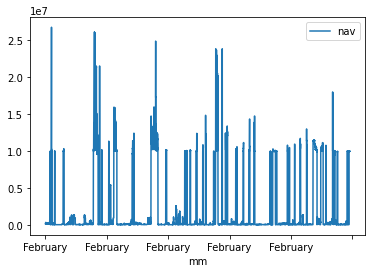

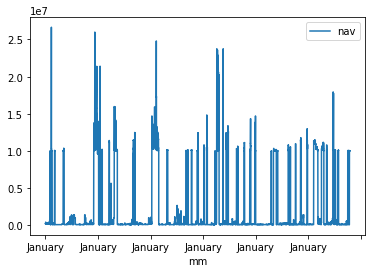

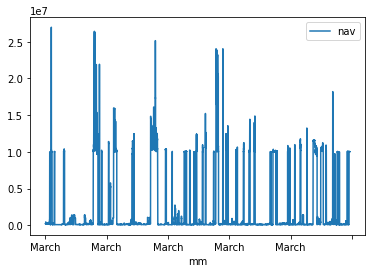

In [21]:
import matplotlib.pyplot as plt


#lines = df_final.plot.line()
df_final.plot(x = 'mm', y = ['nav'])


# Plot a simple line chart
#plt.plot(df_final['nav'], df_final['mm'], color='g', label='Line y')

# Plot another line on the same chart/graph
#plt.plot(df_join_final['x'], df_join_final['z'], color='r', label='Line z')

#plt.legend()
plt.show()


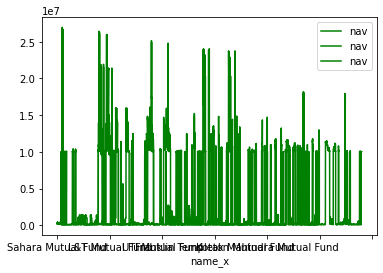

In [22]:
ax = plt.gca()
df_final.plot(kind = 'line',x='name_x',y='nav',color = 'green',ax=ax)
plt.show()

In [44]:
df_new = df_final[['name_x','nav','mm']]

In [46]:
df_new.head()


,name_x,nav,mm
668,Sahara Mutual Fund,239974.0,January
669,Sahara Mutual Fund,238457.0,January
670,Sahara Mutual Fund,236575.0,January
671,Sahara Mutual Fund,238856.0,January
672,Sahara Mutual Fund,239443.0,January
691,Sahara Mutual Fund,236744.0,February
692,Sahara Mutual Fund,237477.0,February
693,Sahara Mutual Fund,238031.0,February
694,Sahara Mutual Fund,239349.0,February
695,Sahara Mutual Fund,240167.0,February


In [42]:
df_sum = df_new.groupby("name_x")['nav'].sum()

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [35]:
df_new.head()



,name_x,nav,mm
668,Sahara Mutual Fund,239974.0,January
669,Sahara Mutual Fund,238457.0,January
670,Sahara Mutual Fund,236575.0,January
671,Sahara Mutual Fund,238856.0,January
672,Sahara Mutual Fund,239443.0,January
691,Sahara Mutual Fund,236744.0,February
692,Sahara Mutual Fund,237477.0,February
693,Sahara Mutual Fund,238031.0,February
694,Sahara Mutual Fund,239349.0,February
695,Sahara Mutual Fund,240167.0,February


In [39]:

df_final["name_x"]=df_final["name_x"].astype('str')
result = df_new.dtypes
print(result)

AttributeError: 'SeriesGroupBy' object has no attribute 'astype'

In [27]:
from pyspark.sql import SparkSession 

spark = SparkSession \
        .builder \
        .appName("milestone1") \
        .getOrCreate()

In [41]:
from pyspark.sql.types import *
mySchema = StructType([StructField("name_x",StringType(),True)\
                       ,StructField("nav",FloatType(),True)\
                       ,StructField("mm",StringType(),True)])
spark.conf.set("spark.sql.execution.arror.enabled","true")
sparkdf=spark.createDataFrame(df_new,schema=mySchema)
sparkdf.printSchema()
sparkdf.show(2)









ValueError: Length of object (2) does not match with length of fields (3)